<a href="https://colab.research.google.com/github/gabrielsluz/POC2/blob/master/SlowFast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses the PySlowFast repository.

https://github.com/facebookresearch/SlowFast/blob/master/INSTALL.md

# Instalation

In [1]:
# !pip install torch==1.3.0
# !pip install torchvision==0.4.1

In [1]:
!pip install 'git+https://github.com/facebookresearch/fvcore'
!pip install simplejson
!pip install av
!pip install psutil
!pip install opencv-python
!pip install tensorboard
!pip install moviepy

  Cloning https://github.com/facebookresearch/fvcore to /tmp/pip-req-build-5cylpel2
  Running command git clone -q https://github.com/facebookresearch/fvcore /tmp/pip-req-build-5cylpel2
     |████████████████████████████████| 276kB 8.0MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2-cp36-none-any.whl size=44581 sha256=46aaea8253a2ab987703937ce9d8900ff0a608179bae5c78f69e648f761e3ff9
  Stored in directory: /tmp/pip-ephem-wheel-cache-1zxhuma_/wheels/04/a4/85/e50340018c00ae6e07e891fed78895891da33700e90a68aa05
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44620 sha256=681b85a02c0a0f49a8c4f7ac803727788f45ef9f24e8ee1e85b227dc020b67e3
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for iopath: filename=iopath-0.1.2-cp36-none-any.whl size=10505 sha256=0b544a0fe0d96a85de02e6aa7d71c6dffb35de44a87159796d99b0fa0464bee7
  Stored in directory: /root/.cache/pip/wheels/9e/01/e4/1b68f5a

In [2]:
!pip install -U cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Requirement already up-to-date: cython in /usr/local/lib/python3.6/dist-packages (0.29.21)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-gdmkpjir
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-gdmkpjir
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-cua381yl
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-cua381yl
  Created wheel for fvcore: filename=fvcore-0.1.2-cp36-none-any.whl size=44581 sha256=376f1c59a487c0ffabe02822b6541a85f6ddb47379c0867656a54ec41a6432f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-6cuxu54a/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266458 sha256=62388c37e1555d940ea03aef4927d04c842ed9f2baff13a77ee602811fdc17d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-6cuxu54a/wheels/90/51/41/646daf4

In [3]:
#!git clone https://github.com/facebookresearch/slowfast
!git clone https://github.com/gabrielsluz/SlowFast.git
!export PYTHONPATH=/content/SlowFast:$PYTHONPATH

Cloning into 'SlowFast'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1088 (delta 0), reused 1 (delta 0), pack-reused 1085
Receiving objects: 100% (1088/1088), 30.13 MiB | 41.35 MiB/s, done.
Resolving deltas: 100% (745/745), done.


In [4]:
%cd /content/SlowFast
!python setup.py build develop

/content/SlowFast
running build
running build_py
creating build
creating build/lib
creating build/lib/slowfast
copying slowfast/__init__.py -> build/lib/slowfast
creating build/lib/slowfast/utils
copying slowfast/utils/parser.py -> build/lib/slowfast/utils
copying slowfast/utils/bn_helper.py -> build/lib/slowfast/utils
copying slowfast/utils/multiprocessing.py -> build/lib/slowfast/utils
copying slowfast/utils/__init__.py -> build/lib/slowfast/utils
copying slowfast/utils/weight_init_helper.py -> build/lib/slowfast/utils
copying slowfast/utils/logging.py -> build/lib/slowfast/utils
copying slowfast/utils/env.py -> build/lib/slowfast/utils
copying slowfast/utils/benchmark.py -> build/lib/slowfast/utils
copying slowfast/utils/misc.py -> build/lib/slowfast/utils
copying slowfast/utils/meters.py -> build/lib/slowfast/utils
copying slowfast/utils/metrics.py -> build/lib/slowfast/utils
copying slowfast/utils/checkpoint.py -> build/lib/slowfast/utils
copying slowfast/utils/ava_eval_helper.py 

# Dataset
## Kinetics


In [5]:
#Download csv files
%cd /content/
!wget https://storage.googleapis.com/deepmind-media/Datasets/kinetics400.tar.gz
!tar -zxvf kinetics400.tar.gz
!mkdir /content/kinetics

/content
--2020-12-17 12:54:11--  https://storage.googleapis.com/deepmind-media/Datasets/kinetics400.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10807306 (10M) [application/octet-stream]
Saving to: ‘kinetics400.tar.gz’

kinetics400.tar.gz  100%[===================>]  10.31M  50.8MB/s    in 0.2s    

2020-12-17 12:54:11 (50.8 MB/s) - ‘kinetics400.tar.gz’ saved [10807306/10807306]

kinetics400/
kinetics400/validate.json
kinetics400/validate.csv
kinetics400/train.json
kinetics400/train.csv
kinetics400/test.json
kinetics400/test.csv


In [6]:
#Picks the first num_lines lines in the csv file.
#Replaces spaces with underlines
%cd /content/
def extract_header(filename, num_lines):
    out_f = open(filename[:-4] + "head.csv" , "w")
    f = open(filename, "r")
    i = 0
    for line in f:
        if i == num_lines:
            break
        i += 1

    out_f.write(line.replace(" ", "_"))

    out_f.close()
    f.close()

extract_header("kinetics400/train.csv", 20)
extract_header("kinetics400/test.csv", 3)
extract_header("kinetics400/validate.csv", 10)

/content


From https://github.com/piaxar/kinetics-downloader

In [7]:
%cd /content/
#!git clone https://github.com/piaxar/kinetics-downloader.git
!git clone https://github.com/gabrielsluz/kinetics-downloader.git
%cd kinetics-downloader
!pip install -r requirements.txt

/content
Cloning into 'kinetics-downloader'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (26/26), done.
/content/kinetics-downloader
     |████████████████████████████████| 40kB 4.9MB/s 


In [8]:
#Download videos
%cd /content/kinetics-downloader
!python download.py /content/kinetics400/trainhead.csv /content/kinetics --trim
!python download.py /content/kinetics400/validatehead.csv /content/kinetics --trim
!python download.py /content/kinetics400/testhead.csv /content/kinetics --trim

/content/kinetics-downloader
Start downloading:  ---QUuC4vJs
Finish downloading:  ---QUuC4vJs
Start trimming:  ---QUuC4vJs
Finish trimming:  ---QUuC4vJs
Processed 1 out of 19
Start downloading:  --3ouPhoy2A
Finish downloading:  --3ouPhoy2A
Start trimming:  --3ouPhoy2A
Finish trimming:  --3ouPhoy2A
Processed 2 out of 19
Start downloading:  --4-0ihtnBU
Finish downloading:  --4-0ihtnBU
Start trimming:  --4-0ihtnBU
Finish trimming:  --4-0ihtnBU
Processed 3 out of 19
Start downloading:  --56QUhyDQM
Finish downloading:  --56QUhyDQM
Start trimming:  --56QUhyDQM
Finish trimming:  --56QUhyDQM
Processed 4 out of 19
Start downloading:  --6q_33gNew
Don't know why something went wrong(
Start downloading:  --EaS9P7ZdQ
Don't know why something went wrong(
Start downloading:  --IPbe5ZMCI
Finish downloading:  --IPbe5ZMCI
Start trimming:  --IPbe5ZMCI
Finish trimming:  --IPbe5ZMCI
Processed 7 out of 19
Start downloading:  --Ntf6n-j9Q
Finish downloading:  --Ntf6n-j9Q
Start trimming:  --Ntf6n-j9Q
Finish tr

The videos must be modified to be used with the SlowFast codebase.

https://github.com/facebookresearch/SlowFast/blob/master/slowfast/datasets/DATASET.md

https://github.com/facebookresearch/video-nonlocal-net/blob/master/process_data/kinetics/downscale_video_joblib.py

Video modification command:

ffmpeg  -loglevel panic -i /content/kinetics/testifying/---QUuC4vJs_84_10.mp4 -filter:v scale="trunc(oh*a/2)*2:256" -q:v 1 -c:a copy movie_256p.mp4

CSV file:

path_to_video_1 label_1

path_to_video_2 label_2

path_to_video_3 label_3

...

path_to_video_N label_N

The labels with spaces will be replaced by underlines

In [13]:
import subprocess
import os

#Modified from: https://github.com/facebookresearch/video-nonlocal-net/blob/master/process_data/kinetics/downscale_video_joblib.py
def downscale_clip(video_path):
  status = False
  inname = '"' + video_path + '"'
  outname = '"'+ video_path[:-4] + 'out.mp4"'
  command = "ffmpeg  -loglevel panic -i {} -filter:v scale=\"trunc(oh*a/2)*2:256\" -q:v 1 -c:a copy {}".format( inname, outname)
  try:
    print("Starting -- " + video_path)
    output = subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    output = subprocess.check_output("mv {} {}".format(outname, inname), shell=True, stderr=subprocess.STDOUT)
    print("Done -- " + video_path)
  except subprocess.CalledProcessError as err:
    print("Erro --" + str(err))
    return status, err.output

  status = True
  return status, 'Downscaled'

#SlowFast requires the labels to be integeres. Therefore, we need to store the labels and the integers
#Generates a dictionary of label to int
#Input => List of files in the Kinetics format
#It returns a dictionary containing and writes on a file
def gen_label_file(file_list, output_file):
  label_dict = {}
  cnt = 0
  for file_path in file_list:
    f = open(file_path, "r")
    for line in f:
      line_split = line.split(',')
      if line_split[0] == 'label':
        continue
      label = line_split[0]
      if not label in label_dict:
        label_dict[label] = str(cnt)
        cnt += 1
    f.close()

  output_file = open(output_file, "w")
  for key in label_dict.keys():
    output_file.write(key + " " + label_dict[key] + "\n")
  output_file.close()
  return label_dict

#Modifies the videos and generates the csv files from the old ones
def prepare_dataset(dataset_path, csv_file, out_file, label_dict):
  input_file = open(csv_file, "r")
  output_file = open(out_file, "w")
  for line in input_file:
    line_split = line.split(',')
    if line_split[0] == 'label':
      continue
    label = line_split[0]
    video_id = line_split[1]
    start_time = line_split[2]
    duration = str(int(line_split[3]) - int(start_time))

    video_path = dataset_path + "/" + label + "/" + video_id + "_"+start_time+"_"+duration+".mp4"
    label_sf = label.replace(' ', '_')

    downscaled, log = downscale_clip(video_path)
    if downscaled == True:
      output_file.write(video_path + " " + label_dict[label_sf] +'\n')
    
  input_file.close()
  output_file.close()

In [14]:
file_list = ['/content/kinetics400/trainhead.csv', '/content/kinetics400/validatehead.csv', '/content/kinetics400/testhead.csv']
label_dict = gen_label_file(file_list, '/content/kinetics/labels.csv')
prepare_dataset('/content/kinetics', '/content/kinetics400/trainhead.csv', '/content/kinetics/train.csv', label_dict)
prepare_dataset('/content/kinetics', '/content/kinetics400/validatehead.csv', '/content/kinetics/val.csv', label_dict)
prepare_dataset('/content/kinetics', '/content/kinetics400/testhead.csv', '/content/kinetics/test.csv', label_dict)

Starting -- /content/kinetics/testifying/---QUuC4vJs_84_10.mp4
Done -- /content/kinetics/testifying/---QUuC4vJs_84_10.mp4
Starting -- /content/kinetics/eating_spaghetti/--3ouPhoy2A_20_10.mp4
Done -- /content/kinetics/eating_spaghetti/--3ouPhoy2A_20_10.mp4
Starting -- /content/kinetics/dribbling_basketball/--4-0ihtnBU_58_10.mp4
Done -- /content/kinetics/dribbling_basketball/--4-0ihtnBU_58_10.mp4
Starting -- /content/kinetics/playing_tennis/--56QUhyDQM_185_10.mp4
Done -- /content/kinetics/playing_tennis/--56QUhyDQM_185_10.mp4
Starting -- /content/kinetics/tap_dancing/--6q_33gNew_132_10.mp4
Erro --Command 'ffmpeg  -loglevel panic -i "/content/kinetics/tap_dancing/--6q_33gNew_132_10.mp4" -filter:v scale="trunc(oh*a/2)*2:256" -q:v 1 -c:a copy "/content/kinetics/tap_dancing/--6q_33gNew_132_10out.mp4"' returned non-zero exit status 1.
Starting -- /content/kinetics/climbing_a_rope/--EaS9P7ZdQ_13_10.mp4
Erro --Command 'ffmpeg  -loglevel panic -i "/content/kinetics/climbing_a_rope/--EaS9P7ZdQ_13

In [12]:
#!ffmpeg -i /content/kinetics/testifying/---QUuC4vJs_84_10.mp4 -vf scale=256:256 movie_360p.mp4
#!ffmpeg  -loglevel panic -i /content/kinetics/testifying/---QUuC4vJs_84_10.mp4 -filter:v scale="trunc(oh*a/2)*2:256" -q:v 1 -c:a copy movie_256p.mp4
#!ffmpeg "/content/kinetics/brushing teeth/--IPbe5ZMCI_2_10.mp4" -filter:v scale="trunc(oh*a/2)*2:256" -q:v 1 -c:a copy "/content/kinetics/brushing teeth/--IPbe5ZMCI_2_10out.mp4"

(256, 454, 3)


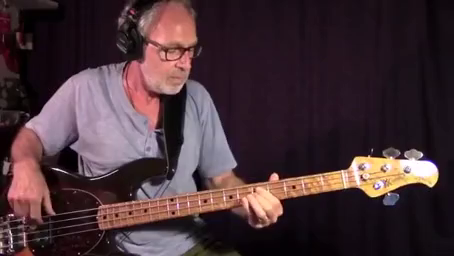

In [1]:
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture("/content/kinetics/playing_bass_guitar/--GF746y6UM_496_10.mp4")
ret, frame = cap.read()
print(frame.shape)
cv2_imshow(frame)

# Teste

In [5]:
%cd /content/SlowFast
!python tools/run_net.py \
  --cfg configs/Kinetics/C2D_8x8_R50.yaml \
  DATA.PATH_TO_DATA_DIR /content/kinetics/ \
  NUM_GPUS 1 \
  TRAIN.BATCH_SIZE 8

/content/SlowFast
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[12/17 13:11:23][INFO] train_net.py: 377: Train with config:
[12/17 13:11:23][INFO] train_net.py: 378: {'AVA': {'ANNOTATION_DIR': '/mnt/vol/gfsai-flash3-east/ai-group/users/haoqifan/ava/frame_list/',
         'BGR': False,
         'DETECTION_SCORE_THRESH': 0.9,
         'EXCLUSION_FILE': 'ava_val_excluded_timestamps_v2.2.csv',
         'FRAME_DIR': '/mnt/fair-flash3-east/ava_trainval_frames.img/',
         'FRAME_LIST_DIR': '/mnt/vol/gfsai-flash3-east/ai-group/users/haoqifan/ava/frame_list/',
         'FULL_TEST_ON_VAL': False,
         'GROUNDTRUTH_FILE': 'ava_val_v2.2.csv',
         'IMG_PROC_BACKEND': 'cv2',
         'LABEL_MAP_FILE': 'ava_action_list_v2.2_for_activitynet_2019.pbtxt',
         'TEST_FORCE_FLIP': False,
         'TEST_LISTS': ['val.csv'],
         'TEST_PREDICT_BOX_LISTS': ['ava_val_predicted_

In [9]:
import torch
print(torch.__version__)

1.7.0+cu101


In [ ]:
y